Simulating diffusion in an heterogeneous nucleus
==========================

The new version of *simSPT* can simulate a nucleus in which the diffusion parameters vary spatially. Indeed, simSPT can simulate nuclei that contain spherical blobs of different diffusive behaviours. For instance, one can define regions of higher and lower fraction bound, or regions that are enriched in proteins.

So far, the simulation have a few limitations, that could be alleviated with a little bit of work. Please do not hesitate to ask me if you need an improvement. So far, simSPT can only:
- Simulate spherical clusters in the cell
- Simulate changes in the fraction bound and enrichment from one cluster to another. It would be relatively straightforward to take into account changes in the diffusion constant.
- Only normal diffusion is simulated.
- The simulation is not performed with substeps, which mean that boundary crossings when a particle enters/leaves a cluster are only taken into account at the end of the step, which can induce biases for slow framerates.

This notebook presents how to use the simulation and how to plot the results

In [1]:
# First, we load a few libraries.
%matplotlib inline
import fastspt
import matplotlib.pyplot as plt
import pandas as pd

# Generating the list of clusters

Clusters are described by a simple CSV file that contains the following columns:
- *nucleus*: the id of the nucleus, in case we work with a file describing several nuclei (not used so far)
- *cluster*: the id of the cluster
- *x,y,z*: the x, y, z coordinates of the center of the cluster
- *r*: the radius of the cluster
- *F_bound*: the fraction bound inside the cluster
- *enrich*: enrichment ration with respect to the background/outside clusters
- *nattempts*: internal variable, do not use.

You can create cluster files by yourself, but you will have to make sure that the clusters are contained within the cell, and that they do not overlap. Alternatively, you can use the `makeclusters` option in *simSPT* to generate a (random) clusters file, called `heterogeneous_clusters.txt`. This command generates a series of 25 clusters of 0.5 µm diameter. You can further edit that file manually if you want.

For instance, this command generates a file describing clusters:

`./simSPT makeclusters`

# Simulating diffusion inside clusters

Once the file describing the clusters has been edited, one can move to single-particle tracking simulations. The syntax is then identical to the one without clusters, one just needs to specify that we are simulating a series of clusters using the `-clusters` flag to point to the previously generated file.

For instance:

`./simSPT -D1=0.01 -D2=1 -p1=0.5 -p2=0.5 -dt=0.013 -clusters=./heterogeneous_clusters.txt`

By default, the resulting traces are stored in a file called `./out.txt`. 

The specific description of any simulation run below can be found in the `README.md` file in the `./heterogeneous` folder.


# Visualizing the simulated data

The code below helps visualizing the simulated data.

In [2]:
def plotme(D, c=None):
    r = 0.5
    if c is not None:
        C = plt.Circle(c[0:2], 1*r, color='r', fill=False)


    plt.figure(figsize=(18, 8))
    ax = plt.subplot(131)
    ax.scatter(D.x, D.y, alpha=0.002)
    plt.xlabel("x")
    plt.ylabel("y")
    
    if c is not None:
        ax.scatter(c[0], c[1])
        ax.add_artist(C)
    ax.set_aspect(1)

    ax = plt.subplot(132)
    ax.scatter(D.x, D.z, alpha=0.002)
    plt.xlabel("x")
    plt.ylabel("z")
    if c is not None:
        ax.scatter(c[0], c[2])
    ax.set_aspect(1)

    if c is not None:
        C = plt.Circle(c[0:2], 1*r, color='r', fill=False)
    ax = plt.subplot(133)
    _ = ax.hist2d(D.x, D.y, bins=(100, 100))
    plt.xlabel("x")
    plt.ylabel("y")
    if c is not None:
        ax.add_artist(C)
    ax.set_aspect(1)

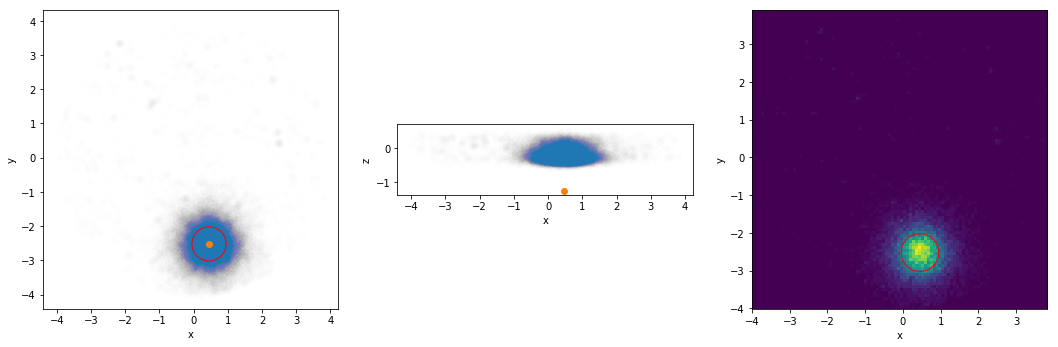

In [8]:
c = (0.451659,-2.520014, -1.266196)
D = pd.read_csv("./1.csv")
plotme(D, c)
plt.savefig("onecluster.png", dpi=150)

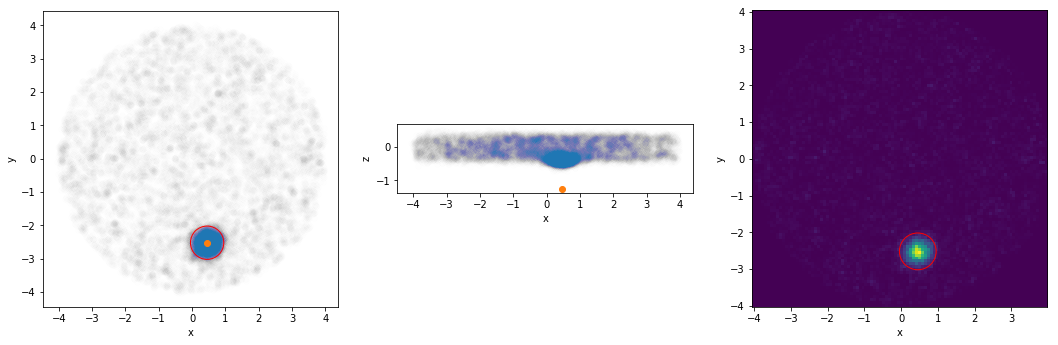

In [96]:
# Same cluster parameters, higher framerate.
c = (0.451659,-2.520014, -1.266196)
D = pd.read_csv("./heterogeneous/2.csv")
plotme(D, c)

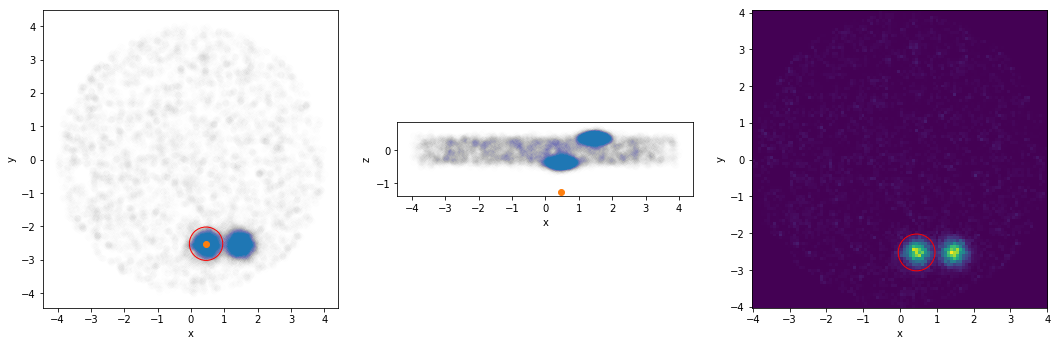

In [95]:
# Same cluster parameters, different locations.
c = (0.451659,-2.520014, -1.266196)
D = pd.read_csv("./heterogeneous/3.csv")
plotme(D, c)

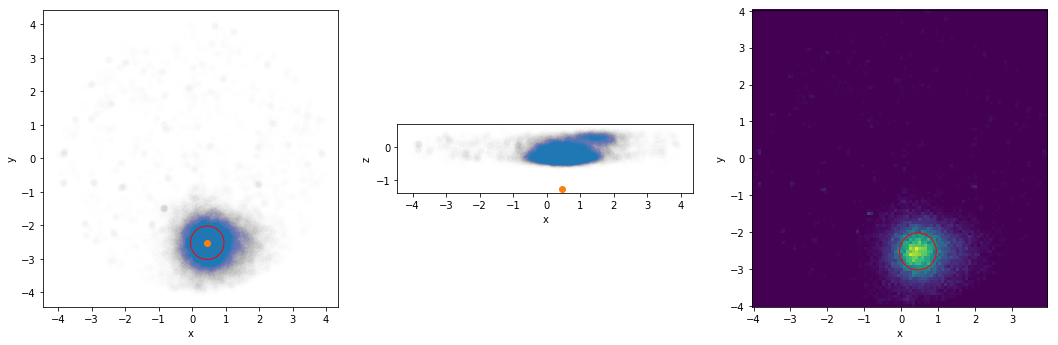

In [91]:
# Same enrichment, but different bound fractions
c = (0.451659,-2.520014, -1.266196)
D = pd.read_csv("./heterogeneous/5.csv")
plotme(D, c)

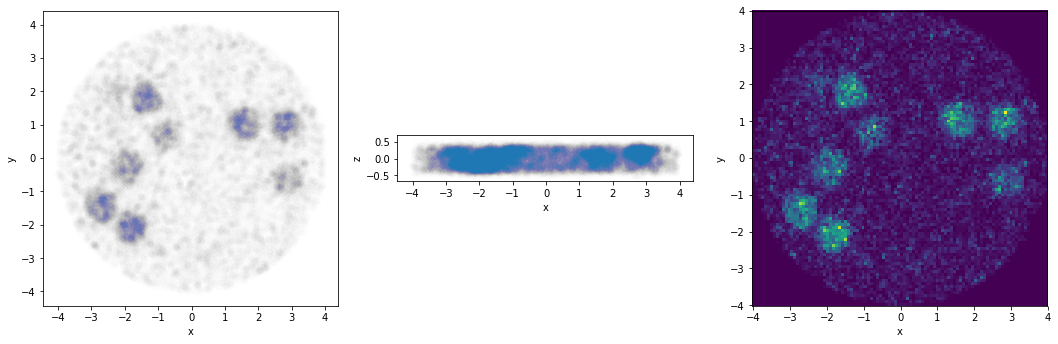

In [7]:
# Multiple clusters
D = pd.read_csv("./4.csv")
plotme(D, c=None)
plt.savefig("mutliclusters.png", dpi=150)